In [ ]:
 %reset

# Dependencies and Imports

In [2]:
# Dependencies to install before use
# For ipyfilechooser and ipywidgets
# conda install -c conda-forge ipywidgets
# conda install -c conda-forge ipyfilechooser
# For TMSiSDK
# download from https://gitlab.com/tmsi/tmsi-python-interface/-/tree/main/TMSiSDK
# and do pip install https://gitlab.com/tmsi/tmsi-python-interface/-/blob/main/requirements_Windows.txt

# Import packages and functions
import os
import json
import ipywidgets as widgets
from IPython.display import display
from ipyfilechooser import FileChooser
from BIDS_input_backend import *
from TMSiSDK.file_readers import Poly5Reader
import numpy as np
import mne
import ipympl


# Subject-specific information
make sure to choose the kernel located at python.exe. Local kernel could let the output be printed twice (This has apart form the visuals no further consequences)


The variables inserted in this first widget will be used for every session-specific JSON initialized in the upcoming second widget. There is no separate JSON-file saved with only these data.

In [3]:

print("Subject-specific information")
display(
    bids_subject,
    bids_sex,
    bids_age,
    bids_handedness,
    bids_date_of_implantation,
    bids_disease_duration,
    bids_PD_subtype,
    bids_symptom_dominant_side,
    bids_LEDD,
    bids_DBS_target,
    bids_DBS_hemispheres,
    bids_DBS_model,
    bids_DBS_description,
    ECOG_present,
    output1,
)

Subject-specific information


BoundedIntText(value=0, description='Subject nr:', layout=Layout(width='800px'), max=150, style=DescriptionSty…

Dropdown(description='Sex:', layout=Layout(width='800px'), options=('n/a', 'female', 'male', 'other'), style=D…

BoundedIntText(value=0, description='Age:', layout=Layout(width='800px'), max=150, style=DescriptionStyle(desc…

RadioButtons(description='handedness', layout=Layout(width='800px'), options=('n/a', 'right', 'left'), style=D…

DatePicker(value=None, description='Date of Implantation', layout=Layout(width='800px'), style=DescriptionStyl…

BoundedIntText(value=0, description='Disease duration:', layout=Layout(width='800px'), max=150, style=Descript…

RadioButtons(description='PD subtype', layout=Layout(width='800px'), options=('n/a', 'akinetic-rigid', 'tremor…

RadioButtons(description='symptom dominant side', layout=Layout(width='800px'), options=('n/a', 'right', 'left…

BoundedIntText(value=0, description='Levodopa equivalent daily dose (LEDD):', layout=Layout(width='800px'), ma…

RadioButtons(description='DBS target', layout=Layout(width='800px'), options=('n/a', 'STN', 'GPI', 'VIM'), sty…

RadioButtons(description='DBS hemisphere', layout=Layout(width='800px'), options=('n/a', 'right', 'left', 'bil…

RadioButtons(description='DBS model', layout=Layout(width='800px'), options=('n/a', 'SenSight Short', 'SenSigh…

RadioButtons(description='DBS description', layout=Layout(width='800px'), options=('n/a', 'Medtronic: 8-contac…

Button(description='ECOG present?', layout=Layout(width='800px'), style=ButtonStyle())

Output()

# Session-specific and recording-specific information


Select Poly5-file to convert and add additional session info. After closing one session, json-file will be saved, and a window for a next session will pop up.


Files are currently saved in folder where this script is stored.

In [4]:
display(session_creation, output2)

Button(description='Create a session', layout=Layout(width='800px'), style=ButtonStyle())

Output()

In [ ]:


































"""
subject 
session + hardware + space + UPDRS + electrode localizations
task  + run + channel names + reference + stimsettings + time of acquisition

1 json file per recording

To Do: electrode size
"""

In [ ]:
    metadict = {}
    metadict['inputdata_location'] = bids_filechooser[-1].selected_path + os.sep + bids_filechooser[-1].selected_filename
    metadict['inputdata_fname'] = bids_filechooser[-1].selected_filename
    metadict['entities'] = {}
    metadict['entities']['subject'] = str(bids_subject.value).zfill(3)
    metadict['entities']['session'] = bids_session[-1].value
    metadict['entities']['task'] = task_options[bids_task[-1].value][0]
    metadict['entities']['acquisition'] = bids_acquisition[-1].value
    metadict['entities']['run'] = bids_run[-1].value
    metadict['entities']['space'] = bids_space[-1].value
    metadict['participants'] = {}
    metadict['participants']['participants_id'] = str()
    metadict['participants']['sex'] = bids_sex.value
    metadict['participants']['handedness'] = bids_handedness.value
    metadict['participants']['age'] = bids_age.value
    try:
        bids_date_of_implantation_str = bids_date_of_implantation.value
        metadict['participants']['date_of_implantation'] = bids_date_of_implantation_str.strftime("%Y-%m-%dT00:00:00")
    except:
        metadict['participants']['date_of_implantation'] = "unknown"
    finally:
        pass
    metadict['participants']['UPDRS_III_preop_OFF'] = str()
    metadict['participants']['UPDRS_III_preop_ON'] = str()
    metadict['participants']['disease_duration'] = bids_disease_duration.value
    metadict['participants']['PD_subtype'] = bids_PD_subtype.value
    metadict['participants']['symptom_dominant_side'] = bids_symptom_dominant_side.value
    metadict['participants']['LEDD'] = bids_LEDD.value
    metadict['participants']['DBS_target'] = bids_DBS_target.value
    metadict['participants']['DBS_hemisphere'] = bids_DBS_hemispheres.value
    metadict['participants']['DBS_manufacturer'] = str()
    metadict['participants']['DBS_model'] = bids_DBS_model.value
    metadict['participants']['DBS_directional'] = str()
    metadict['participants']['DBS_contacts'] = str()
    metadict['participants']['DBS_description'] = bids_DBS_description.value
    metadict['participants']['ECOG_target'] = bids_ECOG_target.value
    metadict['participants']['ECOG_hemisphere'] = bids_ECOG_hemisphere.value
    metadict['participants']['ECOG_manufacturer'] = str()
    metadict['participants']['ECOG_model'] = bids_ECOG_model.value
    metadict['participants']['ECOG_location'] = str()
    metadict['participants']['ECOG_material'] = str()
    metadict['participants']['ECOG_contacts'] = str()
    metadict['participants']['ECOG_description'] = bids_ECOG_description.value
    metadict['scans_tsv'] = {}
    metadict['scans_tsv']['filename'] = str()
    metadict['scans_tsv']['acq_time'] = bids_time_of_acquisition[-1].value
    metadict['scans_tsv']['medication_state'] = str()
    metadict['scans_tsv']['UPDRS_III'] = bids_UPDRS_session[-1].value
    metadict['scans_json'] = {}
    metadict['scans_json']['acq_time'] = {}
    metadict['scans_json']['medication_state'] = {}
    metadict['channels_tsv']= {}
    metadict['channels_tsv']['name'] = bids_channel_names_list
    metadict['channels_tsv']['type'] = []
    metadict['channels_tsv']['units'] = []
    metadict['channels_tsv']['low_cutoff'] = []
    metadict['channels_tsv']['high_cutoff'] = []
    metadict['channels_tsv']['reference'] = []
    metadict['channels_tsv']['group'] = []
    metadict['channels_tsv']['sampling_frequency'] = []
    metadict['channels_tsv']['notch'] = []
    metadict['channels_tsv']['status'] = []
    metadict['channels_tsv']['status_description'] = []
    for widget in bids_status_description_widgets:
        if widget.value == 'n/a':
            metadict['channels_tsv']['status'].append('good')
        else:
            metadict['channels_tsv']['status'].append('bad')
        metadict['channels_tsv']['status_description'].append(widget.value)
    metadict['electrodes_tsv'] = {}
    metadict['electrodes_tsv']['name'] = []
    metadict['electrodes_tsv']['x'] = []
    metadict['electrodes_tsv']['y'] = []
    metadict['electrodes_tsv']['z'] = []
    metadict['electrodes_tsv']['size'] = []
    metadict['electrodes_tsv']['material'] = []
    metadict['electrodes_tsv']['manufacturer'] = []
    metadict['electrodes_tsv']['group'] = []
    metadict['electrodes_tsv']['hemisphere'] = []
    metadict['electrodes_tsv']['type'] = []
    metadict['electrodes_tsv']['impedance'] = []
    metadict['electrodes_tsv']['dimension'] = []
    metadict['coord_json'] = {}
    metadict['coord_json']['IntendedFor'] = str()
    metadict['coord_json']['iEEGCoordinateSystem'] = str()
    metadict['coord_json']['iEEGCoordinateUnits'] = str()
    metadict['coord_json']['iEEGCoordinateSystemDescription'] = str()
    metadict['coord_json']['iEEGCoordinateProcessingDescription'] = str()
    metadict['coord_json']['iEEGCoordinateProcessingReference'] = str()
    metadict['ieeg'] = {}
    metadict['ieeg']['DeviceSerialNumber'] = str()
    metadict['ieeg']['ECGChannelCount'] = int()
    metadict['ieeg']['ECOGChannelCount'] = int()
    metadict['ieeg']['EEGChannelCount'] = int()
    metadict['ieeg']['EMGChannelCount'] = int()
    metadict['ieeg']['EOGChannelCount'] = str()
    metadict['ieeg']['ElectricalStimulation'] = bool()
    metadict['ieeg']['HardwareFilters'] = str()
    metadict['ieeg']['InstitutionAddress'] = str()
    metadict['ieeg']['InstitutionName'] = str()
    metadict['ieeg']['Instructions'] = bids_task_instructions[-1].value
    metadict['ieeg']['Manufacturer'] = str()
    metadict['ieeg']['ManufacturersModelName'] = str()
    metadict['ieeg']['MiscChannelCount'] = int()
    metadict['ieeg']['PowerLineFrequency'] = int()
    metadict['ieeg']['RecordingDuration'] = str()
    metadict['ieeg']['RecordingType'] = str()
    metadict['ieeg']['SEEGChannelCount'] = int()
    metadict['ieeg']['SamplingFrequency'] = float()
    metadict['ieeg']['SoftwareFilters'] = str()
    metadict['ieeg']['SoftwareVersions'] = str()
    metadict['ieeg']['TaskDescription'] = str()
    metadict['ieeg']['TaskName'] = str()
    metadict['ieeg']['TriggerChannelCount'] = int()
    metadict['ieeg']['iEEGElectrodeGroups'] = str()
    metadict['ieeg']['iEEGGround'] = str()
    metadict['ieeg']['iEEGPlacementScheme'] = str()
    metadict['ieeg']['iEEGReference'] = bids_reference[-1].value
    metadict['poly5'] = {}
    for widget in bids_channel_names_widgets:
        metadict['poly5'][widget.description] = widget.value




    currentfile = bids_filechooser[-1].selected_filename
    if not currentfile:
        with output2:
            print(currentfile)
            print("The information could not be saved, please select file below")

    else:
        currentfile += ".json"
        with open(currentfile, "w") as outfile:
            json.dump(metadict, outfile, indent=4)

        with output2:
            print("saving to: %.json", bids_filechooser[-1].selected_filename)
            print("information is saved and cannot be changed")

In [ ]:
#from matplotlib import pyplot as plt
file = r"C:\Users\Jonathan\Documents\DATA\PROJECT_BERLIN_Conversion\sourcedata\sub-010\ses-EcogLfpMedOff01\532LO56_MedOff1_Rest_StimOff_1 - 20220207T113556\532LO56_MedOff1_Rest_StimOff_1-20220207T113556.DATA.Poly5"
data = Poly5Reader(file)

dataraw = np.array(data.samples)

info = mne.create_info(ch_names=[ch._Channel__name for ch in data.channels], sfreq=data.sample_rate, ch_types=data.num_channels*['misc'])

raw = mne.io.RawArray(data.samples, info)

#matplotlib qt5Agg
#matplotlib.use('Qt5Agg')
#%matplotlib qt
raw.plot(show=True, block=True, n_channels=raw.info['nchan'])

In [ ]:
# data = Poly5Reader(bids_filechooser[-1].selected_path + os.sep + bids_filechooser[-1].selected_filename)

# info = mne.create_info(ch_names=[ch._Channel__name for ch in data.channels], sfreq=data.sample_rate, ch_types=data.num_channels * ['misc'])

# raw = mne.io.RawArray(data.samples, info)

bids_channel_names = []

for ch in raw.ch_names:
    if ch.startswith('LFP'):
        preset = 'LFP_' + ch[3] + '_' + ch[4] + '_' + ch[5:8] + '_'
        if ch.endswith('B'):
            preset+='BS'
        elif ch.endswith('M'):
            preset+='MT'
    elif ch.startswith('ECX'):
        preset = 'ECOG_' + ch[3] + '_' + ch[4] + '_' + ch[5:8] + '_'
        if ch.endswith('B'):
            preset+='BS'
        elif ch.endswith('M'):
            preset+='MT'
        elif ch.endswith('A'):
            preset+='AT'
    elif ch.startswith('EEG'):
        preset = 'EEG_'
        if ch.upper().find('CZ'):
             preset += 'CZ_'
        elif ch.upper().find('FZ'):
            preset += 'FZ_'
        if ch.upper().find('TM'):
            preset += 'TM'
    elif ch.startswith('BIP 01'):
        preset = 'EMG_R_BR_TM'
    elif ch.startswith('BIP 02'):
        preset = 'EMG_L_BR_TM'
    elif ch.startswith('BIP 03'):
        preset = 'ECG'
    elif ch.startswith('X-0'):
        preset = 'ACC_R_X_D2_TM'
    elif ch.startswith('Y-0'):
        preset = 'ACC_R_Y_D2_TM'
    elif ch.startswith('Z-0'):
        preset = 'ACC_R_Z_D2_TM'
    elif ch.startswith('X-1'):
        preset = 'ACC_L_X_D2_TM'
    elif ch.startswith('Y-1'):
        preset = 'ACC_L_Y_D2_TM'
    elif ch.startswith('Z-1'):
        preset = 'ACC_L_Z_D2_TM'
    elif ch.startswith('ISO aux'):
        preset = 'ANALOG_R_ROTA_CH'
    else:
        preset = None


    channel_widget = widgets.Text(
        value=preset,
        placeholder='***deleted***',
        description=ch,
        style=style,
        layout=layout
    )
    bids_channel_names.append(channel_widget)


raw.plot(show=True, block=True, n_channels=raw.info['nchan'], title=bids_filechooser[-1].selected_filename)
for widget in bids_channel_names:
    display(widget)
display(save_to_json)

bids_channel_names[-1].value

In [ ]:
bids_channel_names[-1].value
bids_channel_names[-1].description

In [ ]:
raw.ch_names

In [ ]:
#raw.plot(show_options=True, duration=10, title=None, scalings="auto", decim='auto')
import mne
raw.plot( scalings="auto", decim='auto')

In [ ]:
inputdata_location = str()
inputdata_fname = str()
entities = {}
entities['task'] = str()
bidsdict = {}
bidsdict['entities'] = {}
bidsdict['entities']['task'] = 'task'

1.0.3
0.10
Extracting parameters from C:\Users\Jonathan\Charité - Universitätsmedizin Berlin\Interventional Cognitive Neuromodulation - Data\BIDS_Berlin_ECOG_LFP\rawdata\sub-013\ses-EcogLfpMedOn01\ieeg\sub-013_ses-EcogLfpMedOn01_task-BlockRotationL_acq-StimOff_run-1_ieeg.vhdr...
Setting channel info structure...
Using matplotlib as 2D backend.
Opening raw-browser...


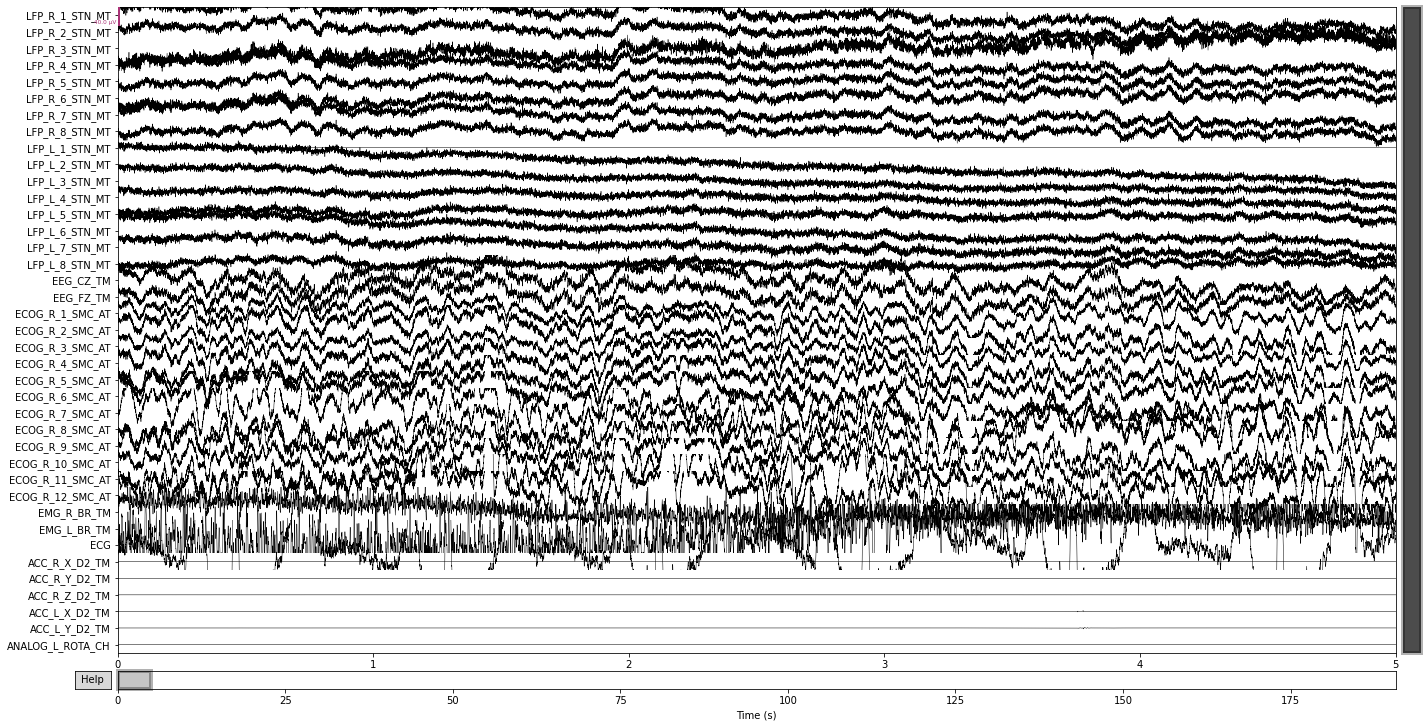

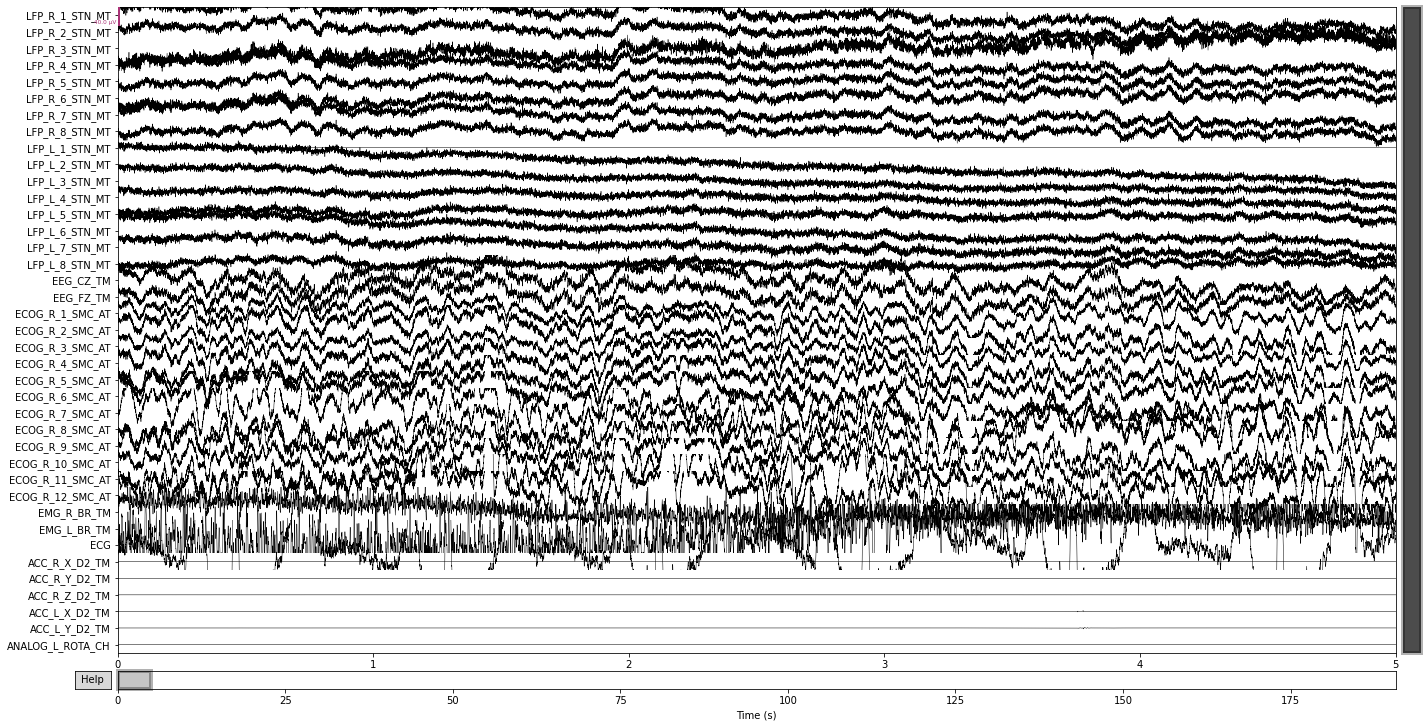

In [1]:
import mne
import mne_bids
print(mne.__version__)
print(mne_bids.__version__)

data = mne.io.read_raw_brainvision(r'C:\Users\Jonathan\Charité - Universitätsmedizin Berlin\Interventional Cognitive Neuromodulation - Data\BIDS_Berlin_ECOG_LFP\rawdata\sub-013\ses-EcogLfpMedOn01\ieeg\sub-013_ses-EcogLfpMedOn01_task-BlockRotationL_acq-StimOff_run-1_ieeg.vhdr')

data.ch_names

data.plot(duration=5, n_channels=39)